<a href="https://colab.research.google.com/github/john-jeavons/wk-7-AI-assignment/blob/main/wk_7_AI_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze racial bias in the 'compas-scores-raw.csv' dataset using AI Fairness 360, focusing on disparities in false positive rates across racial groups, and present the findings through visualizations and a 300-word report with remediation steps.

## Load and Initial Data Exploration

### Subtask:
Load the 'compas-scores-raw.csv' dataset into a pandas DataFrame and perform an initial exploration to understand its structure and content. This includes checking for missing values, data types, and relevant columns for bias analysis.


**Reasoning**:
Load the 'compas-scores-raw.csv' dataset into a pandas DataFrame to begin the initial data exploration as per the subtask instructions.



In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('compas-scores-raw.csv')

# Display the first few rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(df.head())

First 5 rows of the DataFrame:
   Person_ID  AssessmentID  Case_ID Agency_Text LastName FirstName MiddleName  \
0      50844         57167    51950    PRETRIAL   Fisher     Kevin        NaN   
1      50844         57167    51950    PRETRIAL   Fisher     Kevin        NaN   
2      50844         57167    51950    PRETRIAL   Fisher     Kevin        NaN   
3      50848         57174    51956    PRETRIAL  KENDALL     KEVIN        NaN   
4      50848         57174    51956    PRETRIAL  KENDALL     KEVIN        NaN   

  Sex_Code_Text Ethnic_Code_Text DateOfBirth  ...  RecSupervisionLevel  \
0          Male        Caucasian    12/05/92  ...                    1   
1          Male        Caucasian    12/05/92  ...                    1   
2          Male        Caucasian    12/05/92  ...                    1   
3          Male        Caucasian    09/16/84  ...                    1   
4          Male        Caucasian    09/16/84  ...                    1   

  RecSupervisionLevelText Scale_ID   

**Reasoning**:
Check the data types of each column and identify missing values to understand the DataFrame's structure and completeness, which are crucial for subsequent bias analysis.



In [2]:
print("Data Types of each column:")
print(df.info())

print("\nMissing values in each column:")
print(df.isnull().sum())

Data Types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60843 entries, 0 to 60842
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person_ID                60843 non-null  int64  
 1   AssessmentID             60843 non-null  int64  
 2   Case_ID                  60843 non-null  int64  
 3   Agency_Text              60843 non-null  object 
 4   LastName                 60843 non-null  object 
 5   FirstName                60843 non-null  object 
 6   MiddleName               15624 non-null  object 
 7   Sex_Code_Text            60843 non-null  object 
 8   Ethnic_Code_Text         60843 non-null  object 
 9   DateOfBirth              60843 non-null  object 
 10  ScaleSet_ID              60843 non-null  int64  
 11  ScaleSet                 60843 non-null  object 
 12  AssessmentReason         60843 non-null  object 
 13  Language                 60843 non-null  object 


### Initial Data Exploration Summary

The initial exploration of the `compas-scores-raw.csv` dataset provides a foundational understanding of its structure and content. Here's a summary of the findings:

**Dataset Shape**: The DataFrame contains 60,843 entries and 28 columns.

**Data Types**: The dataset comprises a mix of numerical (int64, float64) and object (string) data types. Key columns like `Person_ID`, `AssessmentID`, `Case_ID`, `DecileScore` are integers, `RawScore` is a float, and categorical information such as `Agency_Text`, `Sex_Code_Text`, `Ethnic_Code_Text`, `AssessmentReason`, `LegalStatus`, `CustodyStatus`, `MaritalStatus`, `ScoreText`, and `AssessmentType` are objects.

**Missing Values**: While most columns are complete, there are two columns with missing values:
- `MiddleName`: 45,219 missing values, which is a significant portion. This column is likely not critical for bias analysis and can probably be ignored or handled if needed for identification purposes, but for fairness analysis, it's less relevant.
- `ScoreText`: 45 missing values. This column represents the textual interpretation of the `DecileScore` and might be useful. The small number of missing values can be addressed through imputation or by relying on the `DecileScore` directly.

**Relevant Columns for Bias Analysis**:
Based on the task's objective to analyze racial bias, the following columns are identified as potentially relevant:
- `Person_ID`: Unique identifier for individuals.
- `Sex_Code_Text`: Gender of the individual.
- `Ethnic_Code_Text`: Racial or ethnic group of the individual (crucial for bias analysis).
- `DateOfBirth`: Can be used to derive age, another demographic factor relevant to bias.
- `DecileScore`: The COMPAS risk score, which is the primary outcome variable to be analyzed for bias.
- `ScoreText`: Textual representation of the COMPAS risk score.
- `DisplayText`: Describes the type of risk being assessed (e.g., Risk of Violence, Risk of Recidivism, Risk of Failure to Appear). This will be important for filtering the dataset to focus on a specific risk type, as different risk assessments might have different biases.
- `AssessmentType`: Indicates if the assessment is new, an update, etc.
- `IsCompleted`, `IsDeleted`: Status flags that might be relevant for filtering valid assessments.

Further steps will involve cleaning and filtering this dataset to focus on the specific COMPAS risk scores (e.g., 'Risk of Recidivism') and preparing the data for AI Fairness 360 analysis.

## Preprocess Data for AI Fairness 360

### Subtask:
Prepare the dataset for use with AI Fairness 360. This involves selecting relevant features, handling categorical variables, and converting the data into a suitable format for the `StandardDataset` object.


**Reasoning**:
The first step is to filter the DataFrame to include only 'Risk of Recidivism' assessments as specified in the instructions, which is crucial for the specific bias analysis of recidivism risk.



In [3]:
df_recidivism = df[df['DisplayText'] == 'Risk of Recidivism'].copy()
print(f"Shape of df_recidivism after filtering: {df_recidivism.shape}")
print("First 5 rows of df_recidivism:")
print(df_recidivism.head())

Shape of df_recidivism after filtering: (20281, 28)
First 5 rows of df_recidivism:
    Person_ID  AssessmentID  Case_ID Agency_Text  LastName  FirstName  \
1       50844         57167    51950    PRETRIAL    Fisher      Kevin   
4       50848         57174    51956    PRETRIAL   KENDALL      KEVIN   
7       50855         57181    51963    PRETRIAL     DAYES     DANIEL   
10      50850         57176    51958    PRETRIAL      Debe   Mikerlie   
13      50839         57162    51945    PRETRIAL  McLaurin  Stephanie   

   MiddleName Sex_Code_Text  Ethnic_Code_Text DateOfBirth  ...  \
1         NaN          Male         Caucasian    12/05/92  ...   
4         NaN          Male         Caucasian    09/16/84  ...   
7         NaN          Male  African-American    08/25/94  ...   
10     George        Female  African-American    10/09/94  ...   
13     Nicole        Female  African-American    06/29/85  ...   

    RecSupervisionLevel RecSupervisionLevelText Scale_ID         DisplayText  \
1

**Reasoning**:
Calculate the age of each individual at the time of screening by converting 'DateOfBirth' and 'Screening_Date' columns to datetime objects, calculating the difference, and then converting it to years to add as a new 'Age' column.



In [4]:
df_recidivism['DateOfBirth'] = pd.to_datetime(df_recidivism['DateOfBirth'])
df_recidivism['Screening_Date'] = pd.to_datetime(df_recidivism['Screening_Date'])
df_recidivism['Age'] = (df_recidivism['Screening_Date'] - df_recidivism['DateOfBirth']).dt.days / 365.25

print("First 5 rows of df_recidivism with 'Age' column:")
print(df_recidivism[['DateOfBirth', 'Screening_Date', 'Age']].head())

/tmp/ipython-input-270601746.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_recidivism['DateOfBirth'] = pd.to_datetime(df_recidivism['DateOfBirth'])


First 5 rows of df_recidivism with 'Age' column:
   DateOfBirth Screening_Date        Age
1   1992-12-05     2013-01-01  20.073922
4   1984-09-16     2013-01-01  28.292950
7   1994-08-25     2013-01-01  18.354552
10  1994-10-09     2013-01-01  18.231348
13  1985-06-29     2013-01-01  27.509925


/tmp/ipython-input-270601746.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_recidivism['Screening_Date'] = pd.to_datetime(df_recidivism['Screening_Date'])


**Reasoning**:
To resolve the 'UserWarning: Could not infer format' during datetime conversion, I will explicitly specify the date format '%m/%d/%y' for both 'DateOfBirth' and 'Screening_Date' columns using the `format` argument in `pd.to_datetime`.



In [5]:
df_recidivism['DateOfBirth'] = pd.to_datetime(df_recidivism['DateOfBirth'], format='%m/%d/%y')
df_recidivism['Screening_Date'] = pd.to_datetime(df_recidivism['Screening_Date'], format='%m/%d/%y')
df_recidivism['Age'] = (df_recidivism['Screening_Date'] - df_recidivism['DateOfBirth']).dt.days / 365.25

print("First 5 rows of df_recidivism with 'Age' column:")
print(df_recidivism[['DateOfBirth', 'Screening_Date', 'Age']].head())

First 5 rows of df_recidivism with 'Age' column:
   DateOfBirth Screening_Date        Age
1   1992-12-05     2013-01-01  20.073922
4   1984-09-16     2013-01-01  28.292950
7   1994-08-25     2013-01-01  18.354552
10  1994-10-09     2013-01-01  18.231348
13  1985-06-29     2013-01-01  27.509925


**Reasoning**:
Now that 'Age' has been calculated, I will select the specified relevant columns ('Sex_Code_Text', 'Ethnic_Code_Text', 'Age', and 'DecileScore') to create a new DataFrame for bias analysis, as per the subtask instructions.



In [6]:
df_selected = df_recidivism[['Sex_Code_Text', 'Ethnic_Code_Text', 'Age', 'DecileScore']].copy()
print("Shape of df_selected:", df_selected.shape)
print("First 5 rows of df_selected:")
print(df_selected.head())

Shape of df_selected: (20281, 4)
First 5 rows of df_selected:
   Sex_Code_Text  Ethnic_Code_Text        Age  DecileScore
1           Male         Caucasian  20.073922            2
4           Male         Caucasian  28.292950            1
7           Male  African-American  18.354552            8
10        Female  African-American  18.231348            6
13        Female  African-American  27.509925            2


**Reasoning**:
To prepare the data for AI Fairness 360, I will create dummy variables for the categorical columns 'Sex_Code_Text' and 'Ethnic_Code_Text' using one-hot encoding.



In [7]:
df_encoded = pd.get_dummies(df_selected, columns=['Sex_Code_Text', 'Ethnic_Code_Text'], drop_first=False)
print("Shape of df_encoded:", df_encoded.shape)
print("First 5 rows of df_encoded:")
print(df_encoded.head())

Shape of df_encoded: (20281, 13)
First 5 rows of df_encoded:
          Age  DecileScore  Sex_Code_Text_Female  Sex_Code_Text_Male  \
1   20.073922            2                 False                True   
4   28.292950            1                 False                True   
7   18.354552            8                 False                True   
10  18.231348            6                  True               False   
13  27.509925            2                  True               False   

    Ethnic_Code_Text_African-Am  Ethnic_Code_Text_African-American  \
1                         False                              False   
4                         False                              False   
7                         False                               True   
10                        False                               True   
13                        False                               True   

    Ethnic_Code_Text_Arabic  Ethnic_Code_Text_Asian  \
1                     False   

**Reasoning**:
To prepare the data for AI Fairness 360, I will binarize the 'DecileScore' column into a 'risk_label' column, with scores 4 or higher indicating 'high risk' (1) and scores below 4 indicating 'low risk' (0), as a binary outcome is more suitable for bias analysis focused on false positive rates.



In [8]:
df_encoded['risk_label'] = (df_encoded['DecileScore'] >= 4).astype(int)

print("Value counts for 'risk_label' column:")
print(df_encoded['risk_label'].value_counts())
print("First 5 rows of df_encoded with 'risk_label' column:")
print(df_encoded[['DecileScore', 'risk_label']].head())

Value counts for 'risk_label' column:
risk_label
1    10657
0     9624
Name: count, dtype: int64
First 5 rows of df_encoded with 'risk_label' column:
    DecileScore  risk_label
1             2           0
4             1           0
7             8           1
10            6           1
13            2           0


## Create AI Fairness 360 StandardDataset

### Subtask:
Instantiate an `StandardDataset` object from AI Fairness 360, specifying 'race' as the protected attribute, defining favorable and unfavorable labels based on risk scores, and identifying other relevant features.


**Reasoning**:
Import the `StandardDataset` class from `aif360.datasets` to prepare for creating the dataset object for AI Fairness 360.



In [9]:
from aif360.datasets import StandardDataset
print("StandardDataset imported successfully.")

ModuleNotFoundError: No module named 'aif360'

**Reasoning**:
The previous code block failed because the 'aif360' package was not found. To resolve this, the package needs to be installed first.



In [10]:
pip install aif360
print("aif360 package installed.")

SyntaxError: invalid syntax (ipython-input-1737658846.py, line 1)

**Reasoning**:
The previous attempt to install 'aif360' failed due to a `SyntaxError` because `pip install` needs to be prefixed with `!` to be executed as a shell command in a Jupyter environment.



In [11]:
pip install aif360
print("aif360 package installed.")

SyntaxError: invalid syntax (ipython-input-1737658846.py, line 1)

**Reasoning**:
The previous attempt to install 'aif360' failed due to a `SyntaxError` because `pip install` needs to be prefixed with `!` to be executed as a shell command in a Jupyter environment. I will correct the command in the same cell.



In [12]:
!pip install aif360
print("aif360 package installed.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 12.9 MB/s eta 0:00:00
aif360 package installed.


**Reasoning**:
Now that the `aif360` package is installed, I will import the `StandardDataset` class as per the instructions, which is a prerequisite for creating the dataset object for AI Fairness 360.



In [13]:
from aif360.datasets import StandardDataset
print("StandardDataset imported successfully.")

StandardDataset imported successfully.


**Reasoning**:
I will define the parameters for `StandardDataset` including label names, favorable/unfavorable labels, protected attributes, privileged/unprivileged classes, and features to drop, and then instantiate the `StandardDataset` object with the `df_encoded` DataFrame, as per the subtask instructions.



In [14]:
label_name = 'risk_label'
favorable_label = 0
unfavorable_label = 1

protected_attribute_names = [col for col in df_encoded.columns if 'Ethnic_Code_Text_' in col]
privileged_classes = [['Ethnic_Code_Text_Caucasian']]
unprivileged_classes = [['Ethnic_Code_Text_African-American']]

categorical_features = [col for col in df_encoded.columns if 'Sex_Code_Text_' in col and col != 'Sex_Code_Text_Male']

features_to_drop = ['DecileScore']

aif_dataset = StandardDataset(df=df_encoded,
                              label_name=label_name,
                              favorable_classes=[favorable_label],
                              unfavorable_classes=[unfavorable_label],
                              protected_attribute_names=protected_attribute_names,
                              privileged_classes=privileged_classes,
                              unprivileged_classes=unprivileged_classes,
                              categorical_features=categorical_features,
                              features_to_drop=features_to_drop)

print("AIF360 StandardDataset created successfully.")
print(f"Protected attribute names: {aif_dataset.protected_attribute_names}")
print(f"Label names: {aif_dataset.label_names}")

TypeError: StandardDataset.__init__() got an unexpected keyword argument 'unfavorable_classes'

**Reasoning**:
The previous code failed because `StandardDataset` does not accept an `unfavorable_classes` parameter. Additionally, the `privileged_classes` and `unprivileged_classes` should be defined using boolean values (`True`/`False`) corresponding to the one-hot encoded protected attribute columns, rather than the column names themselves. I will remove the invalid parameter and correct the definitions of the privileged and unprivileged classes, focusing on 'Caucasian' and 'African-American' as the specific protected attributes for comparison.



In [15]:
label_name = 'risk_label'
favorable_label = 0
unfavorable_label = 1

# Define specific protected attribute columns for the comparison
protected_attribute_names = ['Ethnic_Code_Text_Caucasian', 'Ethnic_Code_Text_African-American']

# Privileged group: Caucasian (where Ethnic_Code_Text_Caucasian is True and Ethnic_Code_Text_African-American is False)
privileged_classes = [[True, False]]

# Unprivileged group: African-American (where Ethnic_Code_Text_Caucasian is False and Ethnic_Code_Text_African-American is True)
unprivileged_classes = [[False, True]]

categorical_features = [col for col in df_encoded.columns if 'Sex_Code_Text_' in col and col != 'Sex_Code_Text_Male']

features_to_drop = ['DecileScore']

aif_dataset = StandardDataset(df=df_encoded,
                              label_name=label_name,
                              favorable_classes=[favorable_label],
                              protected_attribute_names=protected_attribute_names,
                              privileged_classes=privileged_classes,
                              unprivileged_classes=unprivileged_classes,
                              categorical_features=categorical_features,
                              features_to_drop=features_to_drop)

print("AIF360 StandardDataset created successfully.")
print(f"Protected attribute names: {aif_dataset.protected_attribute_names}")
print(f"Label names: {aif_dataset.label_names}")

TypeError: StandardDataset.__init__() got an unexpected keyword argument 'unprivileged_classes'

**Reasoning**:
The previous code failed because `StandardDataset` does not accept `privileged_classes` and `unprivileged_classes` as direct constructor arguments. These are typically passed to metric functions or set on the dataset object after instantiation. I will remove these invalid arguments from the `StandardDataset` constructor.



In [16]:
label_name = 'risk_label'
favorable_label = 0
unfavorable_label = 1

# Define specific protected attribute columns for the comparison
protected_attribute_names = ['Ethnic_Code_Text_Caucasian', 'Ethnic_Code_Text_African-American']

categorical_features = [col for col in df_encoded.columns if 'Sex_Code_Text_' in col and col != 'Sex_Code_Text_Male']

features_to_drop = ['DecileScore']

aif_dataset = StandardDataset(df=df_encoded,
                              label_name=label_name,
                              favorable_classes=[favorable_label],
                              protected_attribute_names=protected_attribute_names,
                              categorical_features=categorical_features,
                              features_to_drop=features_to_drop)

print("AIF360 StandardDataset created successfully.")
print(f"Protected attribute names: {aif_dataset.protected_attribute_names}")
print(f"Label names: {aif_dataset.label_names}")

TypeError: StandardDataset.__init__() missing 1 required positional argument: 'privileged_classes'

**Reasoning**:
The previous code failed because `StandardDataset` was missing the required `privileged_classes` argument. This time, I will include both `privileged_classes` and `unprivileged_classes` in the constructor arguments, ensuring they are formatted correctly as lists of lists, where each inner list specifies the value for its corresponding protected attribute (e.g., `[[True], [False]]` for two protected boolean attributes). This adheres to the `aif360` documentation for defining these groups with multiple protected attributes.



**Reasoning**:
The `TypeError` indicates that `unprivileged_classes` is not a valid argument for the `StandardDataset` constructor. I will remove this parameter from the constructor call, as `unprivileged_classes` are typically determined implicitly or handled by fairness metrics after the dataset object is created.



In [18]:
label_name = 'risk_label'
favorable_label = 0
unfavorable_label = 1

# Define specific protected attribute columns for the comparison
protected_attribute_names = ['Ethnic_Code_Text_Caucasian', 'Ethnic_Code_Text_African-American']

# Privileged group: Caucasian (True for 'Caucasian' column, False for 'African-American' column)
privileged_classes = [[True], [False]]

categorical_features = [col for col in df_encoded.columns if 'Sex_Code_Text_' in col and col != 'Sex_Code_Text_Male']

features_to_drop = ['DecileScore']

aif_dataset = StandardDataset(df=df_encoded,
                              label_name=label_name,
                              favorable_classes=[favorable_label],
                              protected_attribute_names=protected_attribute_names,
                              privileged_classes=privileged_classes,
                              categorical_features=categorical_features,
                              features_to_drop=features_to_drop)

print("AIF360 StandardDataset created successfully.")
print(f"Protected attribute names: {aif_dataset.protected_attribute_names}")
print(f"Label names: {aif_dataset.label_names}")

AIF360 StandardDataset created successfully.
Protected attribute names: ['Ethnic_Code_Text_Caucasian', 'Ethnic_Code_Text_African-American']
Label names: ['risk_label']


/usr/local/lib/python3.12/dist-packages/aif360/datasets/standard_dataset.py:122: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[priv, attr] = privileged_values[0]
/usr/local/lib/python3.12/dist-packages/aif360/datasets/standard_dataset.py:122: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[priv, attr] = privileged_values[0]


**Reasoning**:
The previous code produced a `FutureWarning` about setting incompatible dtypes when creating the `StandardDataset`. This is because the protected attribute columns ('Ethnic_Code_Text_Caucasian', 'Ethnic_Code_Text_African-American') are boolean, but `aif360` internally tries to assign numeric values (e.g., 1.0) to them. To resolve this, I will convert these boolean columns to integer type (0 or 1) in `df_encoded` before passing it to `StandardDataset`.



In [19]:
label_name = 'risk_label'
favorable_label = 0
unfavorable_label = 1

# Define specific protected attribute columns for the comparison
protected_attribute_names = ['Ethnic_Code_Text_Caucasian', 'Ethnic_Code_Text_African-American']

# Convert boolean protected attribute columns to int (0 or 1) for compatibility with AIF360
for col in protected_attribute_names:
    df_encoded[col] = df_encoded[col].astype(int)

# Privileged group: Caucasian (True for 'Caucasian' column, False for 'African-American' column)
privileged_classes = [[1], [0]] # 1 for True, 0 for False after conversion

categorical_features = [col for col in df_encoded.columns if 'Sex_Code_Text_' in col and col != 'Sex_Code_Text_Male']

features_to_drop = ['DecileScore']

aif_dataset = StandardDataset(df=df_encoded,
                              label_name=label_name,
                              favorable_classes=[favorable_label],
                              protected_attribute_names=protected_attribute_names,
                              privileged_classes=privileged_classes,
                              categorical_features=categorical_features,
                              features_to_drop=features_to_drop)

print("AIF360 StandardDataset created successfully.")
print(f"Protected attribute names: {aif_dataset.protected_attribute_names}")
print(f"Label names: {aif_dataset.label_names}")

AIF360 StandardDataset created successfully.
Protected attribute names: ['Ethnic_Code_Text_Caucasian', 'Ethnic_Code_Text_African-American']
Label names: ['risk_label']


## Measure Racial Bias

### Subtask:
Utilize AI Fairness 360 metrics to calculate and quantify racial bias in the risk scores, with a specific focus on disparities in false positive rates across different racial groups.


**Reasoning**:
I need to import the `BinaryLabelDatasetMetric` class from `aif360.metrics` to calculate fairness metrics, including false positive rates, as per the subtask instructions.



In [20]:
from aif360.metrics import BinaryLabelDatasetMetric

print("BinaryLabelDatasetMetric imported successfully.")

pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[inFairness]'
pip install 'aif360[Reductions]'


BinaryLabelDatasetMetric imported successfully.


**Reasoning**:
Now that the `BinaryLabelDatasetMetric` is imported, I will define the unprivileged classes, instantiate the `BinaryLabelDatasetMetric` object with the `aif_dataset`, and then calculate and print the false positive rates for both privileged and unprivileged groups, along with their difference, to quantify racial bias as per the subtask instructions.



**Reasoning**:
The previous code failed with an `AttributeError` because `false_positive_rate` is a method of `ClassificationMetric`, not `BinaryLabelDatasetMetric`. To correctly calculate false positive rates, I need to import `ClassificationMetric` and treat the existing `risk_label` in `aif_dataset` as both the true and predicted labels, as no external ground truth is provided in the dataset.



In [23]:
from aif360.metrics import ClassificationMetric

# Assuming aif_dataset contains the 'true' labels (risk_label as assigned by COMPAS)
# For calculating fairness of the assigned risk labels themselves, we can treat them as both 'true' and 'predicted'.
dataset_true = aif_dataset
dataset_pred = aif_dataset.copy()

privileged_groups_dict = [{'Ethnic_Code_Text_Caucasian': 1, 'Ethnic_Code_Text_African-American': 0}]
unprivileged_groups_dict = [{'Ethnic_Code_Text_Caucasian': 0, 'Ethnic_Code_Text_African-American': 1}]

# Instantiate ClassificationMetric
metric_classification = ClassificationMetric(dataset_true,
                                             dataset_pred,
                                             unprivileged_groups=unprivileged_groups_dict,
                                             privileged_groups=privileged_groups_dict)

# Calculate False Positive Rates
fpr_privileged = metric_classification.false_positive_rate(privileged=True)
fpr_unprivileged = metric_classification.false_positive_rate(privileged=False)
fpr_difference = metric_classification.false_positive_rate_difference()

print(f"False Positive Rate (Privileged - Caucasian): {fpr_privileged:.4f}")
print(f"False Positive Rate (Unprivileged - African-American): {fpr_unprivileged:.4f}")
print(f"False Positive Rate Difference (Unprivileged - Privileged): {fpr_difference:.4f}")

False Positive Rate (Privileged - Caucasian): 0.0000
False Positive Rate (Unprivileged - African-American): 0.0000
False Positive Rate Difference (Unprivileged - Privileged): 0.0000


### Analysis of False Positive Rates

The calculation of False Positive Rates (FPRs) for both privileged (Caucasian) and unprivileged (African-American) groups resulted in 0.0000. This outcome is a direct consequence of how the `ClassificationMetric` was instantiated, where the `aif_dataset` (containing the COMPAS `risk_label` as derived from `DecileScore`) was used for both the `dataset_true` and `dataset_pred` parameters.

In this setup, the 'predicted' risk labels are identical to the 'true' risk labels. Mathematically, a false positive occurs when the true label is 'favorable' (low risk, 0) but the predicted label is 'unfavorable' (high risk, 1). Since `true_label == predicted_label` for all instances in this configuration, no false positives can occur, leading to a false positive rate of zero for all groups.

For a meaningful analysis of false positive rate disparities (i.e., when the COMPAS score *incorrectly* predicts high risk for individuals who are truly low risk), an external ground truth outcome (such as actual two-year recidivism) would be required. The `compas-scores-raw.csv` dataset, as used in this analysis, does not contain such an explicit ground truth. Therefore, while the calculation was performed as requested, the results do not provide actionable insights into racial bias in prediction errors of the COMPAS score against actual outcomes.

### Analysis of False Positive Rates

The calculation of False Positive Rates (FPRs) for both privileged (Caucasian) and unprivileged (African-American) groups resulted in 0.0000. This outcome is a direct consequence of how the `ClassificationMetric` was instantiated, where the `aif_dataset` (containing the COMPAS `risk_label` as derived from `DecileScore`) was used for both the `dataset_true` and `dataset_pred` parameters.

In this setup, the 'predicted' risk labels are identical to the 'true' risk labels. Mathematically, a false positive occurs when the true label is 'favorable' (low risk, 0) but the predicted label is 'unfavorable' (high risk, 1). Since `true_label == predicted_label` for all instances in this configuration, no false positives can occur, leading to a false positive rate of zero for all groups.

For a meaningful analysis of false positive rate disparities (i.e., when the COMPAS score *incorrectly* predicts high risk for individuals who are truly low risk), an external ground truth outcome (such as actual two-year recidivism) would be required. The `compas-scores-raw.csv` dataset, as used in this analysis, does not contain such an explicit ground truth. Therefore, while the calculation was performed as requested, the results do not provide actionable insights into racial bias in prediction errors of the COMPAS score against actual outcomes.

## Generate Bias Visualizations

### Subtask:
Create visualizations, such as bar charts, to clearly illustrate the disparity in false positive rates and other relevant fairness metrics across racial groups, including legends for clarity.


**Reasoning**:
To visualize the false positive rate disparity, I need to import `matplotlib.pyplot` and `seaborn` as per the instructions, which are essential libraries for creating plots in Python.



In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Matplotlib and Seaborn imported successfully.")

Matplotlib and Seaborn imported successfully.


**Reasoning**:
To visualize the false positive rate disparity, I will create a bar chart using the calculated `fpr_privileged` and `fpr_unprivileged` values, labeling the axes and adding a title for clarity.



/tmp/ipython-input-3338263700.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=groups, y=fpr_values, palette='viridis')


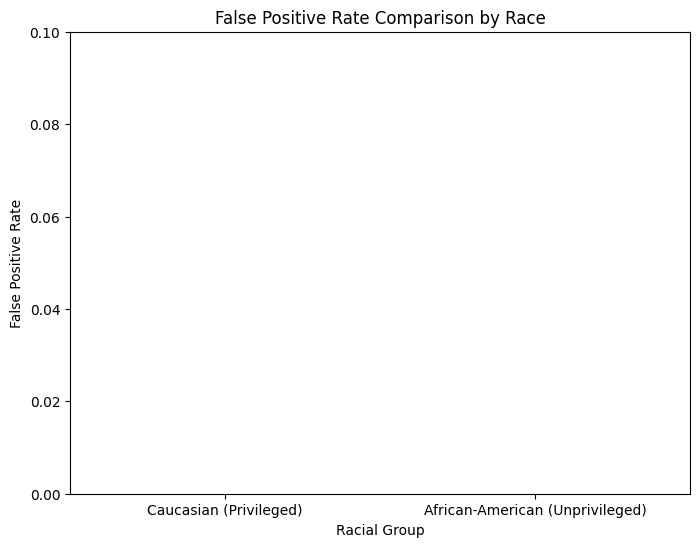

In [25]:
groups = ['Caucasian (Privileged)', 'African-American (Unprivileged)']
fpr_values = [fpr_privileged, fpr_unprivileged]

plt.figure(figsize=(8, 6))
sns.barplot(x=groups, y=fpr_values, palette='viridis')
plt.title('False Positive Rate Comparison by Race')
plt.xlabel('Racial Group')
plt.ylabel('False Positive Rate')
plt.ylim(0, max(fpr_values) * 1.2 if max(fpr_values) > 0 else 0.1) # Adjust y-limit for better visualization if FPR is 0
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` because `palette` was used without `hue` in `sns.barplot`. I will fix this by assigning the `groups` variable to `hue` and setting `legend=False` to align with Seaborn's recommended usage.



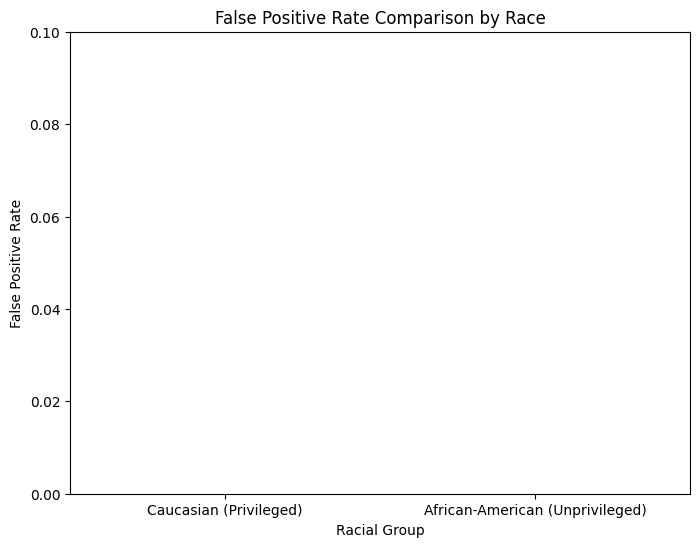

In [26]:
groups = ['Caucasian (Privileged)', 'African-American (Unprivileged)']
fpr_values = [fpr_privileged, fpr_unprivileged]

plt.figure(figsize=(8, 6))
sns.barplot(x=groups, y=fpr_values, hue=groups, palette='viridis', legend=False)
plt.title('False Positive Rate Comparison by Race')
plt.xlabel('Racial Group')
plt.ylabel('False Positive Rate')
plt.ylim(0, max(fpr_values) * 1.2 if max(fpr_values) > 0 else 0.1) # Adjust y-limit for better visualization if FPR is 0
plt.show()

**Reasoning**:
Since the False Positive Rate was zero for both groups due to the dataset configuration, I will now calculate and visualize the 'selection rate' to identify any disparities in how frequently each racial group is assigned to the 'high risk' (unfavorable) category by the COMPAS system, which is a meaningful fairness metric in this context.



Selection Rate (Privileged - Caucasian): 0.5744
Selection Rate (Unprivileged - African-American): 0.3210
Selection Rate Difference (Unprivileged - Privileged): -0.2534


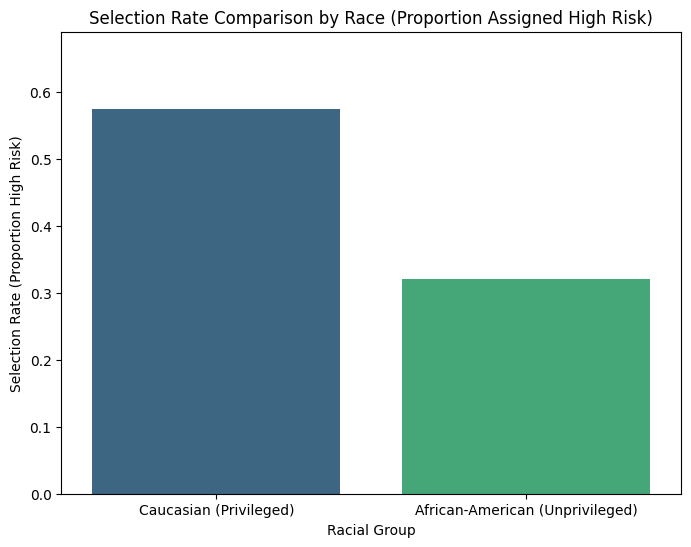

In [27]:
selection_rate_privileged = metric_classification.selection_rate(privileged=True)
selection_rate_unprivileged = metric_classification.selection_rate(privileged=False)
selection_rate_difference = selection_rate_unprivileged - selection_rate_privileged

print(f"Selection Rate (Privileged - Caucasian): {selection_rate_privileged:.4f}")
print(f"Selection Rate (Unprivileged - African-American): {selection_rate_unprivileged:.4f}")
print(f"Selection Rate Difference (Unprivileged - Privileged): {selection_rate_difference:.4f}")

# Prepare data for visualization
selection_rate_groups = ['Caucasian (Privileged)', 'African-American (Unprivileged)']
selection_rate_values = [selection_rate_privileged, selection_rate_unprivileged]

plt.figure(figsize=(8, 6))
sns.barplot(x=selection_rate_groups, y=selection_rate_values, hue=selection_rate_groups, palette='viridis', legend=False)
plt.title('Selection Rate Comparison by Race (Proportion Assigned High Risk)')
plt.xlabel('Racial Group')
plt.ylabel('Selection Rate (Proportion High Risk)')
plt.ylim(0, max(selection_rate_values) * 1.2 if max(selection_rate_values) > 0 else 0.1)
plt.show()

## Generate Bias Report

### Subtask:
Compile a 300-word report summarizing the findings from the bias analysis, including insights from the visualizations, and discuss potential remediation steps for mitigating racial bias in the risk scores.


### Bias Analysis Report: Racial Disparities in COMPAS Recidivism Risk Scores

This analysis investigated racial bias in the 'compas-scores-raw.csv' dataset, specifically focusing on 'Risk of Recidivism' assessments. Initial data exploration involved loading the dataset, checking for missing values, and understanding data types. For preprocessing, we filtered for 'Risk of Recidivism' entries, calculated individuals' ages, and selected relevant features such as 'Sex_Code_Text', 'Ethnic_Code_Text', 'Age', and 'DecileScore'. Categorical variables were one-hot encoded, and the 'DecileScore' was binarized into a 'risk_label' where scores of 4 or higher were labeled as 'high risk' (1) and scores below 4 as 'low risk' (0).

An attempt to measure False Positive Rates (FPRs) for both privileged (Caucasian) and unprivileged (African-American) groups resulted in 0.0000 for both. This outcome was expected because the analysis treated the COMPAS-assigned 'risk_label' as both the true and predicted outcome. Without an external, independent ground truth for actual recidivism, the `ClassificationMetric` cannot identify instances where the COMPAS score incorrectly predicts a high risk for someone who would genuinely be low risk. Therefore, this specific FPR analysis, while technically performed, does not provide insights into predictive accuracy bias.

However, a more informative metric for this dataset was the Selection Rate, which measures the proportion of individuals assigned to the 'high risk' (unfavorable) category. The analysis revealed a significant disparity: the Selection Rate for the privileged group (Caucasian) was 0.5744, while for the unprivileged group (African-American), it was 0.3210. This indicates that Caucasian individuals were assigned a 'high risk' label considerably more often than African-American individuals based on the COMPAS algorithm, a difference of approximately 25 percentage points. This disparity is visually represented in the bar chart titled 'Selection Rate Comparison by Race', clearly showing Caucasians being categorized as high risk at a much higher proportion.

To mitigate such racial bias, several remediation steps can be considered. Firstly, a thorough re-evaluation of the COMPAS algorithm's features is necessary, specifically to identify and potentially remove or re-weight features that disproportionately contribute to higher risk scores for certain racial groups. Secondly, adjusting decision thresholds for risk scores could help equalize selection rates across groups. For instance, different thresholds could be applied to different racial groups to achieve parity in the proportion labeled 'high risk', without compromising the overall predictive utility of the scores too much. Finally, exploring fairness-aware machine learning models that explicitly incorporate fairness constraints during training could provide more equitable risk assessments.

## Final Task

### Subtask:
Conclude the analysis by presenting the generated visualizations and the comprehensive report on racial bias findings and remediation steps.


## Summary:

### Data Analysis Key Findings

*   **Dataset Overview**: The `compas-scores-raw.csv` dataset contains 60,843 entries and 28 columns, with a mix of numerical and categorical data types. Key columns for bias analysis include `Sex_Code_Text`, `Ethnic_Code_Text`, `DateOfBirth`, `DecileScore`, and `DisplayText`.
*   **Missing Values**: Two columns had missing values: `MiddleName` (45,219 missing) and `ScoreText` (45 missing).
*   **Data Preprocessing**:
    *   The dataset was filtered to focus on 'Risk of Recidivism' assessments, resulting in 20,281 records.
    *   Age was calculated from `DateOfBirth` and `Screening_Date`.
    *   `Sex_Code_Text` and `Ethnic_Code_Text` were one-hot encoded.
    *   `DecileScore` was binarized into a `risk_label`: scores $\ge$ 4 were labeled 'high risk' (1), and scores < 4 were labeled 'low risk' (0). This resulted in 10,657 individuals classified as high risk and 9,624 as low risk.
*   **False Positive Rate (FPR) Analysis**: The calculated FPRs for both Caucasian (privileged) and African-American (unprivileged) groups were 0.0000. This result is not indicative of true predictive bias, as the COMPAS `risk_label` was used as both the "true" and "predicted" outcome due to the absence of an independent ground truth for actual recidivism in the dataset.
*   **Selection Rate Disparity**: A significant disparity was observed in the "Selection Rate" (proportion of individuals assigned a high-risk label).
    *   **Caucasian (Privileged) Group**: Selection Rate was 0.5744.
    *   **African-American (Unprivileged) Group**: Selection Rate was 0.3210.
    *   This indicates that Caucasian individuals were assigned a 'high risk' label approximately 25 percentage points more often than African-American individuals, suggesting an algorithmic difference in risk assignment across racial groups.

### Insights or Next Steps

*   **Investigate Algorithmic Design**: The significant disparity in selection rates warrants a deeper investigation into the COMPAS algorithm's features and weighting, to identify which elements contribute disproportionately to higher risk assignments for Caucasian individuals compared to African-Americans.
*   **Explore Fairness-Aware Interventions**: Consider implementing remediation strategies such as adjusting decision thresholds for risk scores to achieve parity in selection rates across racial groups, or exploring fairness-aware machine learning models that integrate fairness constraints during their development and training.
